<a href="https://colab.research.google.com/github/rohit28900/Car-prediction/blob/main/WD_Net_Elsevier_New_Work_for_Glucose_Prediction_60_Min_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
import numpy


from numpy import array
from numpy import hstack
from numpy import insert

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


import tensorflow as tf
import datetime

In [ ]:

# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
from  google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DK Dataset for 10 Days 10 Adult/Adult10_10days.csv')

In [ ]:
df

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk
0,09-08-2021 06:00,152.830000,181.677486,0.0,0.016975,0.0,3.274061,3.274061
1,09-08-2021 06:05,152.830000,187.097984,0.0,0.016975,0.0,3.274061,3.274061
2,09-08-2021 06:10,152.830000,186.176440,0.0,0.016975,0.0,3.274061,3.274061
3,09-08-2021 06:15,152.830000,182.217881,0.0,0.016975,0.0,3.274061,3.274061
4,09-08-2021 06:20,152.830000,177.434207,0.0,0.016975,0.0,3.274061,3.274061
...,...,...,...,...,...,...,...,...
2875,10-08-2021 05:35,146.049224,153.265374,0.0,0.016975,0.0,2.373677,2.373677
2876,10-08-2021 05:40,146.139877,155.444183,0.0,0.016975,0.0,2.385009,2.385009
2877,10-08-2021 05:45,146.231235,154.115020,0.0,0.016975,0.0,2.396450,2.396450
2878,10-08-2021 05:50,146.323174,150.820998,0.0,0.016975,0.0,2.407984,2.407984


In [ ]:
df['Time']=pd.to_datetime(df['Time'], infer_datetime_format= True) 

In [ ]:
df_input=df[['CGM','CHO']]

In [ ]:
df_input

,CGM,CHO
0,181.677486,0.0
1,187.097984,0.0
2,186.176440,0.0
3,182.217881,0.0
4,177.434207,0.0
...,...,...
2875,153.265374,0.0
2876,155.444183,0.0
2877,154.115020,0.0
2878,150.820998,0.0


In [ ]:
m=df_input.iloc[:,0:1]
n=df_input.iloc[:,1:2]

In [ ]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
data_scaled1 = scaler1.fit_transform(m)
data_scaled2 = scaler2.fit_transform(n)

In [ ]:
features1=data_scaled1
features2=data_scaled2
target=data_scaled1[:,0]

In [ ]:
target

array([0.43447486, 0.45098111, 0.44817486, ..., 0.35054292, 0.34051211,
       0.33086623])

Set the output structure

In [ ]:
a = insert(target, 0, 0)
a

array([0.        , 0.43447486, 0.45098111, ..., 0.35054292, 0.34051211,
       0.33086623])

In [ ]:
b=target[0:]
b1= numpy.roll(b,-1)
b2 = insert(b1, 0, 0)
b2

array([0.        , 0.45098111, 0.44817486, ..., 0.34051211, 0.33086623,
       0.43447486])

In [ ]:
b=target[0:]
c1= numpy.roll(b,-2)
c2 = insert(c1, 0, 0)
c2

array([0.        , 0.44817486, 0.43612044, ..., 0.33086623, 0.43447486,
       0.45098111])

In [ ]:
b=target[0:]
d1= numpy.roll(b,-3)
d2 = insert(d1, 0, 0)
d2

array([0.        , 0.43612044, 0.42155342, ..., 0.43447486, 0.45098111,
       0.44817486])

In [ ]:
b=target[0:]
e1= numpy.roll(b,-4)
e2 = insert(e1, 0, 0)
e2

array([0.        , 0.42155342, 0.41088532, ..., 0.45098111, 0.44817486,
       0.43612044])

In [ ]:
b=target[0:]
f1= numpy.roll(b,-5)
f2 = insert(f1, 0, 0)

In [ ]:
b=target[0:]
g1= numpy.roll(b,-6)
g2 = insert(g1, 0, 0)

In [ ]:
b=target[0:]
h1= numpy.roll(b,-7)
h2 = insert(h1, 0, 0)

In [ ]:
b=target[0:]
i1= numpy.roll(b,-8)
i2 = insert(i1, 0, 0)

In [ ]:
b=target[0:]
j1= numpy.roll(b,-9)
j2 = insert(j1, 0, 0)

In [ ]:
b=target[0:]
k1= numpy.roll(b,-10)
k2 = insert(k1, 0, 0)

In [ ]:
b=target[0:]
l1= numpy.roll(b,-11)
l2 = insert(l1, 0, 0)

In [ ]:
a5 = a.reshape((len(a), 1,1))
b5 = b2.reshape((len(b2), 1,1))
c5 = c2.reshape((len(c2), 1,1))
d5 = d2.reshape((len(d2), 1,1))
e5 = e2.reshape((len(e2), 1,1))
f5 = f2.reshape((len(f2), 1,1))
g5 = a.reshape((len(g2), 1,1))
h5 = b2.reshape((len(h2), 1,1))
i5 = c2.reshape((len(i2), 1,1))
j5 = d2.reshape((len(j2), 1,1))
k5 = e2.reshape((len(k2), 1,1))
l5 = f2.reshape((len(l2), 1,1))

In [ ]:
target_data = hstack((a5, b5, c5, d5, e5, f5, g5, h5, i5, j5, k5, l5))

In [ ]:
p=len(target_data)
new_target_data=target_data[:p-11]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features1[:-10], new_target_data[:], test_size=0.20, random_state=123, shuffle= False)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features2[:-10], new_target_data[:], test_size=0.20, random_state=123, shuffle= False)

In [ ]:
win_length=288
batch_size=32
num_features=2

In [ ]:
CHO_in = keras.layers.Input(shape=(win_length, 1), name="wide_input")
CGM_in = keras.layers.Input(shape = (win_length, 1), name='deep_input')

GRU_1 = keras.layers.GRU(128, return_sequences=True)(CGM_in)
activation_layer1 = keras.layers.LeakyReLU(alpha=0.9)(GRU_1)


LSTM_1 = keras.layers.LSTM(128, return_sequences=True)(activation_layer1)
activation_layer2 = keras.layers.LeakyReLU(alpha=0.3)(LSTM_1)


dropout_layer1 = keras.layers.Dropout(0.01)(activation_layer2)


concat = keras.layers.concatenate([CHO_in, dropout_layer1])


GRU_2 = keras.layers.GRU(128, return_sequences=False)(concat)


dropout_layer2 = keras.layers.Dropout(0.01)(GRU_2)


output=keras.layers.Dense(12,name='CGM_Out')(dropout_layer2)
model= keras.Model(inputs=[CGM_in,CHO_in], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 288, 1)]     0           []                               
                                                                                                  
 gru (GRU)                      (None, 288, 128)     50304       ['deep_input[0][0]']             
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 288, 128)     0           ['gru[0][0]']                    
                                                                                                  
 lstm (LSTM)                    (None, 288, 128)     131584      ['leaky_re_lu[0][0]']            
                                                                                              

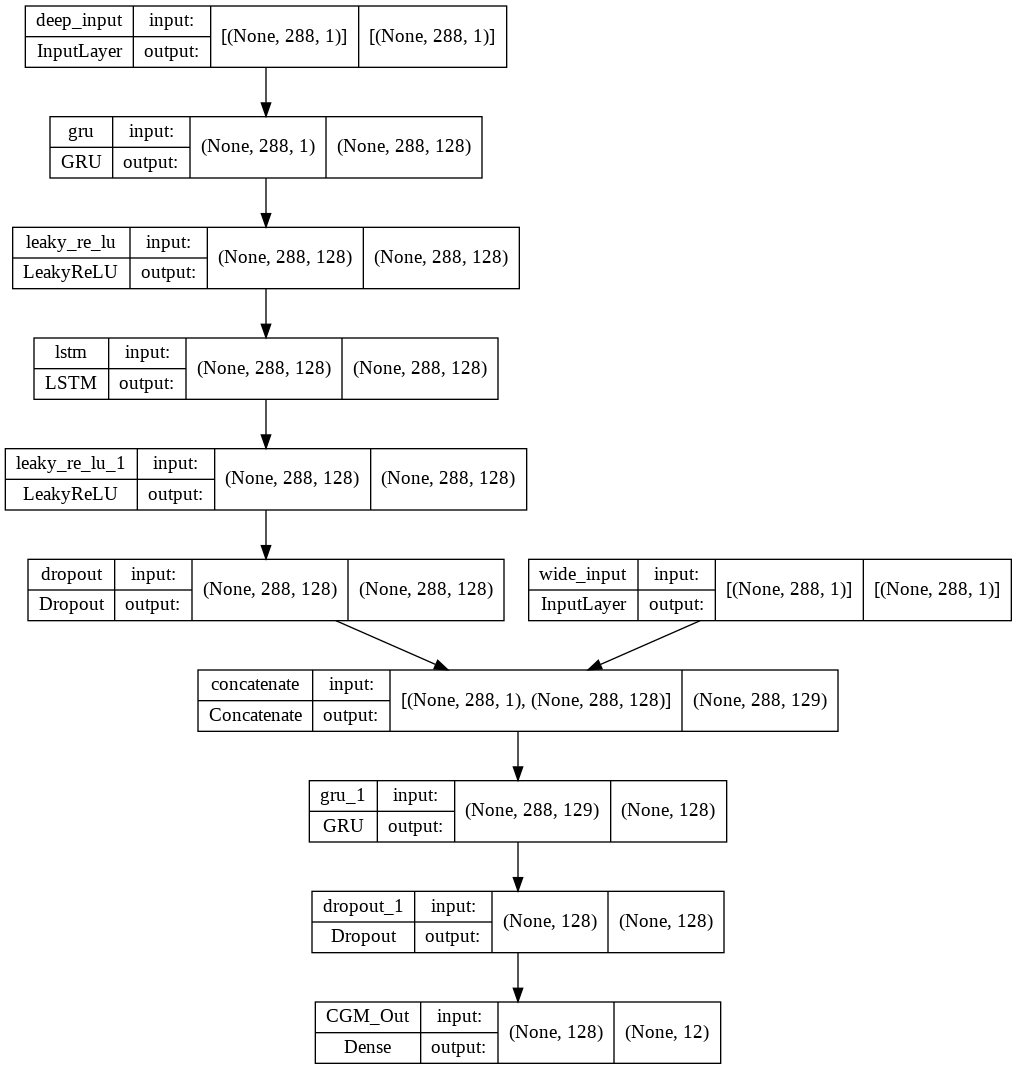

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history=model.fit((x_train,x_train1),y_train, epochs = 100, validation_data=((x_test, x_test1), y_test), shuffle=False, callbacks=[tensorboard_callback])

Epoch 1/100
72/72 [==============================] - 10s 21ms/step - loss: 0.0690 - mean_absolute_error: 0.1957 - val_loss: 0.0293 - val_mean_absolute_error: 0.1448
Epoch 2/100
72/72 [==============================] - 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0704 - val_loss: 0.0046 - val_mean_absolute_error: 0.0546
Epoch 3/100
72/72 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0352 - val_loss: 0.0027 - val_mean_absolute_error: 0.0371
Epoch 4/100
72/72 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0316 - val_loss: 0.0022 - val_mean_absolute_error: 0.0325
Epoch 5/100
72/72 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0305 - val_loss: 0.0020 - val_mean_absolute_error: 0.0297
Epoch 6/100
72/72 [==============================] - 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0292 - val_loss: 0.0019 - val_mean_absolute_error: 0.0276
Epoch 7/100
72/72 [=

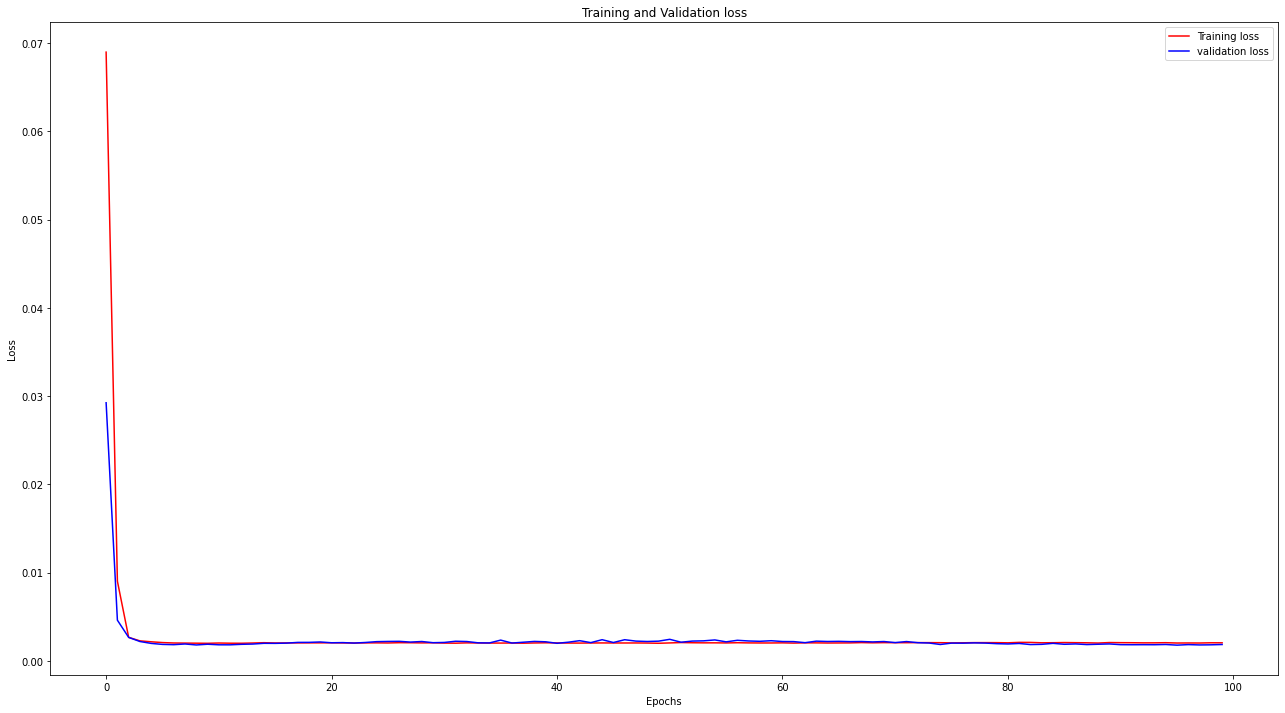

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(100)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
mpl.rcParams['figure.figsize'] = (22,12)
plt.legend()
plt.show()

In [ ]:

#%tensorboard --logdir logs/fit

In [ ]:
y_pred = model.predict((x_test, x_test1))

In [ ]:
y_pred

array([[0.28408515, 0.28389567, 0.28537622, ..., 0.28742796, 0.29204622,
        0.2988038 ],
       [0.27949744, 0.2792621 , 0.28079084, ..., 0.28285947, 0.2875021 ,
        0.29436064],
       [0.2758303 , 0.27556574, 0.27713284, ..., 0.27921236, 0.28387973,
        0.290816  ],
       ...,
       [0.3047982 , 0.304825  , 0.3061429 , ..., 0.30802813, 0.3124548 ,
        0.31883872],
       [0.30675635, 0.30679664, 0.30811143, ..., 0.30996993, 0.31438112,
        0.32072803],
       [0.30767184, 0.30771846, 0.3090318 , ..., 0.31087783, 0.3152818 ,
        0.32161132]], dtype=float32)

In [ ]:
y_pred_final=scaler1.inverse_transform(y_pred)

In [ ]:
y_pred_final

array([[132.29091, 132.2287 , 132.71489, ..., 133.38866, 134.90526,
        137.12439],
       [130.78435, 130.70706, 131.20909, ..., 131.88841, 133.41301,
        135.66528],
       [129.5801 , 129.49323, 130.00784, ..., 130.69073, 132.22345,
        134.50127],
       ...,
       [139.09288, 139.10168, 139.53447, ..., 140.15356, 141.60724,
        143.70366],
       [139.73593, 139.74916, 140.18092, ..., 140.79123, 142.23982,
        144.3241 ],
       [140.03656, 140.05186, 140.48317, ..., 141.08939, 142.5356 ,
        144.61415]], dtype=float32)

In [ ]:
y_pred_final.shape

(574, 12)

In [ ]:
df5 = pd.DataFrame(y_pred_final, columns =['Predicted at T0', 'Predicted at T1', 'Predicted at T2', 'Predicted at T3', 'Predicted at T4', 'Predicted at T5', 'Predicted at T6', 'Predicted at T7', 'Predicted at T8', 'Predicted at T9', 'Predicted at T10', 'Predicted at T11' ])
print("\nPandas DataFrame: ")
df5


Pandas DataFrame: 


,Predicted at T0,Predicted at T1,Predicted at T2,Predicted at T3,Predicted at T4,Predicted at T5,Predicted at T6,Predicted at T7,Predicted at T8,Predicted at T9,Predicted at T10,Predicted at T11
0,132.290909,132.228699,132.714890,133.631485,135.223740,136.933105,132.456406,131.593063,132.436249,133.388657,134.905258,137.124390
1,130.784348,130.707062,131.209091,132.127304,133.745651,135.480011,130.945068,130.066330,130.924927,131.888412,133.413010,135.665283
2,129.580093,129.493225,130.007843,130.930466,132.565247,134.321136,129.741959,128.847931,129.718231,130.690735,132.223450,134.501266
3,128.537750,128.442688,128.968140,129.894623,131.543564,133.317978,128.700684,127.793465,128.673798,129.654160,131.193832,133.493713
4,127.565231,127.462715,127.998230,128.928284,130.590424,132.382050,127.729309,126.809799,127.699455,128.687149,130.233276,132.553726
...,...,...,...,...,...,...,...,...,...,...,...,...
569,137.669327,137.668427,138.103577,139.017212,140.501846,142.159378,137.852982,137.019287,137.842880,138.742020,140.206848,142.330215
570,138.286743,138.290054,138.724121,139.633774,141.109360,142.759445,138.471893,137.634293,138.463486,139.354202,140.814209,142.925888
571,139.092880,139.101685,139.534470,140.438873,141.902649,143.542847,139.280060,138.437408,139.273880,140.153564,141.607239,143.703659
572,139.735931,139.749161,140.180923,141.081146,142.535461,144.167725,139.924744,139.078110,139.920334,140.791229,142.239822,144.324097


In [ ]:
df5.head()

,Predicted at T0,Predicted at T1,Predicted at T2,Predicted at T3,Predicted at T4,Predicted at T5,Predicted at T6,Predicted at T7,Predicted at T8,Predicted at T9,Predicted at T10,Predicted at T11
0,132.290909,132.228699,132.714890,133.631485,135.223740,136.933105,132.456406,131.593063,132.436249,133.388657,134.905258,137.124390
1,130.784348,130.707062,131.209091,132.127304,133.745651,135.480011,130.945068,130.066330,130.924927,131.888412,133.413010,135.665283
2,129.580093,129.493225,130.007843,130.930466,132.565247,134.321136,129.741959,128.847931,129.718231,130.690735,132.223450,134.501266
3,128.537750,128.442688,128.968140,129.894623,131.543564,133.317978,128.700684,127.793465,128.673798,129.654160,131.193832,133.493713
4,127.565231,127.462715,127.998230,128.928284,130.590424,132.382050,127.729309,126.809799,127.699455,128.687149,130.233276,132.553726


In [ ]:
y_pred[:,2]

array([0.28537622, 0.28079084, 0.27713284, 0.2739668 , 0.27101326,
       0.2690829 , 0.27132708, 0.2810566 , 0.36274108, 0.37400413,
       0.3722315 , 0.36451697, 0.35569197, 0.3502166 , 0.3498195 ,
       0.3503808 , 0.3467839 , 0.3369492 , 0.32522973, 0.31719863,
       0.31613776, 0.3204476 , 0.3274466 , 0.33507857, 0.3425946 ,
       0.34958887, 0.35590008, 0.36190006, 0.36801085, 0.37397012,
       0.37755367, 0.37821832, 0.3734525 , 0.36503193, 0.35622573,
       0.35110012, 0.3524302 , 0.36551052, 0.40351596, 0.44764563,
       0.4938278 , 0.5356993 , 0.5702909 , 0.5952208 , 0.6109909 ,
       0.62478137, 0.64491403, 0.6752304 , 0.70985365, 0.74105084,
       0.76341033, 0.7761326 , 0.77951914, 0.7742368 , 0.76177466,
       0.74386626, 0.72281694, 0.7021885 , 0.6855804 , 0.6744228 ,
       0.66551137, 0.6547398 , 0.6397772 , 0.62212616, 0.6041631 ,
       0.58831036, 0.5769745 , 0.573937  , 0.5805284 , 0.57300735,
       0.555682  , 0.53286034, 0.50871664, 0.486936  , 0.47026

In [ ]:
df['CGM'][2304:]

2304    160.124169
2305    163.992595
2306    163.384391
2307    160.734785
2308    157.699976
           ...    
2875    153.265374
2876    155.444183
2877    154.115020
2878    150.820998
2879    147.653381
Name: CGM, Length: 576, dtype: float64

In [ ]:
y_orig = df['CGM'][2304:]
y_orig.reset_index(drop=True, inplace = True)

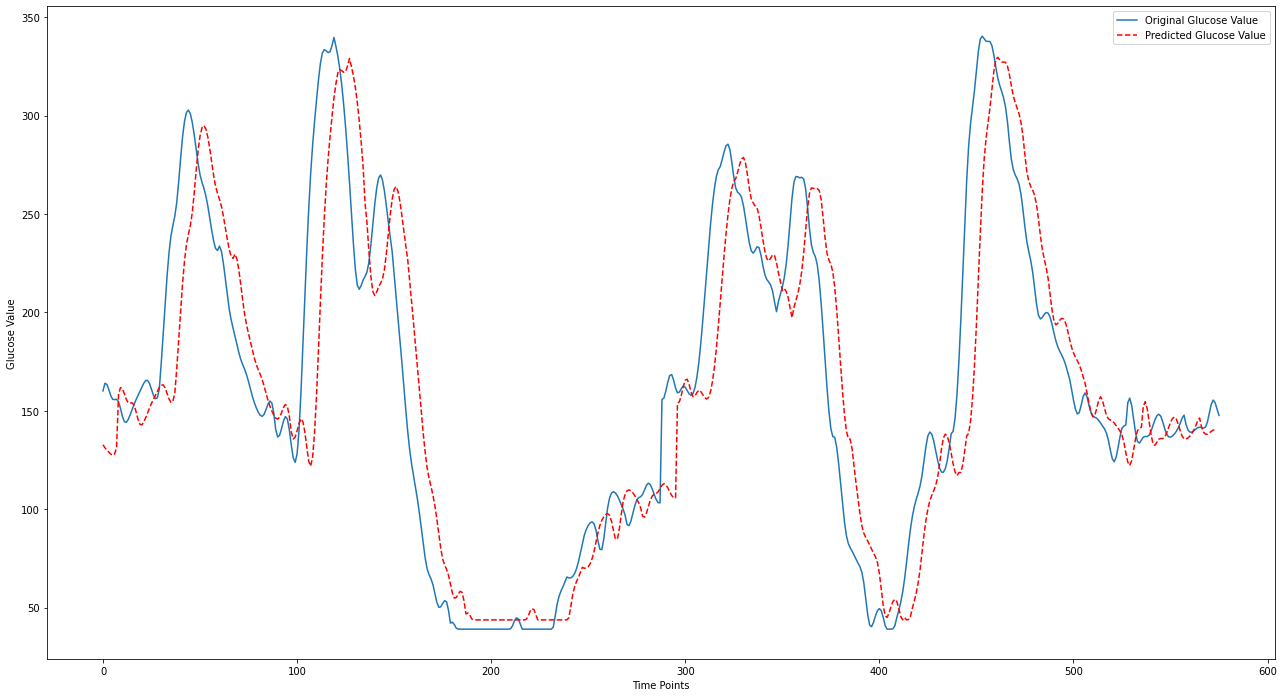

In [ ]:
plt.plot(y_orig,label='Original Glucose Value')
plt.plot(y_pred_final[:,2],'--',color="Red", label='Predicted Glucose Value')
plt.xlabel('Time Points')
plt.ylabel('Glucose Value')
mpl.rcParams['figure.figsize'] = (22,12)
plt.legend()
plt.show()

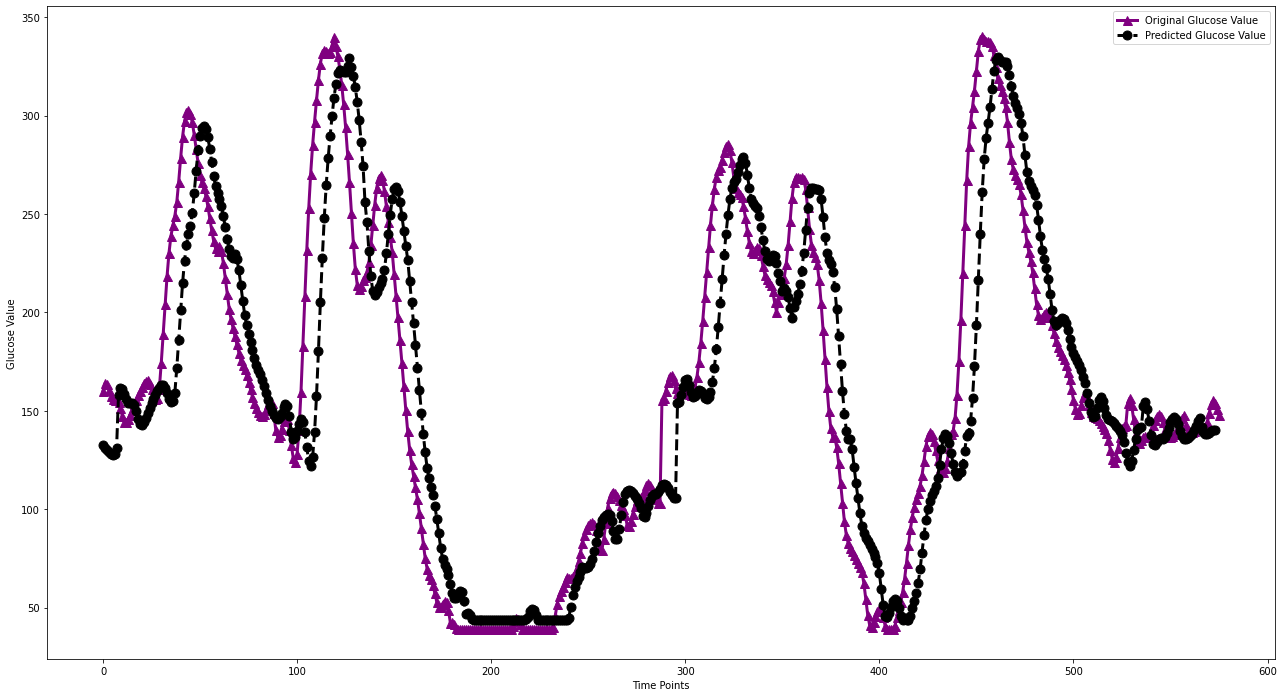

In [ ]:
plt.plot(y_orig,linestyle='-',marker='^',label='Original Glucose Value', color="Purple", linewidth=3, markerfacecolor='Purple', markersize=9)
plt.plot(y_pred_final[:,2],linestyle='--',marker='o',color="Black", label='Predicted Glucose Value', linewidth=3,  markerfacecolor='Black', markersize=9)
plt.xlabel('Time Points')
plt.ylabel('Glucose Value')
mpl.rcParams['figure.figsize'] = (22,12)
plt.legend()
plt.show()

In [ ]:
import numpy as np
np.where(y_pred_final[:,2] == max(y_pred_final[:,2]))


(array([461]),)

In [ ]:
np.where(y_orig == max(y_orig))

(array([453]),)

In [ ]:
jd=df['CGM'][2304:].values

In [ ]:
jd1= pd.DataFrame(jd, columns = ['Original CGM at T0'])

In [ ]:
result = pd.concat([jd1, df5], axis=1, join='inner')
display(result)

,Original CGM at T0,Predicted at T0,Predicted at T1,Predicted at T2,Predicted at T3,Predicted at T4,Predicted at T5,Predicted at T6,Predicted at T7,Predicted at T8,Predicted at T9,Predicted at T10,Predicted at T11
0,160.124169,132.976456,132.686035,133.357498,134.157715,135.579178,137.044632,132.824738,132.173492,133.292984,134.383926,135.677322,137.072342
1,163.992595,131.462173,131.175995,131.857239,132.664734,134.105240,135.599152,131.329956,130.676804,131.782242,132.903946,134.207901,135.621124
2,163.384391,130.249313,129.969360,130.655365,131.470306,132.927643,134.443024,130.135132,129.478333,130.573013,131.721649,133.032349,134.459198
3,160.734785,129.178101,128.907013,129.590729,130.415405,131.888229,133.421127,129.080231,128.418488,129.507996,130.680588,131.995743,133.435654
4,157.699976,128.177628,127.914902,128.596527,129.430267,130.917480,132.466660,128.095093,127.428772,128.513428,129.708435,131.027634,132.479706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,144.171492,138.408966,138.103745,138.754562,139.534760,140.874420,142.219177,138.206360,137.566269,138.710007,139.702682,140.974976,142.288651
570,148.710765,139.033813,138.729889,139.378876,140.154831,141.486115,142.818100,138.830627,138.189606,139.335236,140.319992,141.586914,142.890579
571,153.265374,139.845551,139.543900,140.189072,140.958740,142.280594,143.598068,139.642914,138.999680,140.147552,141.123108,142.382248,143.673615
572,155.444183,140.493149,140.193344,140.835510,141.600128,142.914429,144.220261,140.291016,139.646011,140.795654,141.763916,143.016769,144.298340


RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(result['Original CGM at T0'][400:580], result['Predicted at T0'][400:580]))
print(rmse)

39.059684343971114


MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE= mean_absolute_error(result['Original CGM at T0'][400:580], result['Predicted at T0'][400:580])
print(MAE)

25.40629009181618


MARD

In [ ]:
summation = 0
n = 573                                              
for i in range (200, 573):                                      
  difference = abs(result['Original CGM at T0'][i] - result['Predicted at T0'][i])
  Devide_Part = difference/result['Original CGM at T0'][i]                        
  summation = summation + Devide_Part                
MARD = summation/n *100                                           
print(MARD)

11.580951499957107
